<a href="https://colab.research.google.com/github/avyaktawrat/SHALA2020/blob/master/Assignments/Data_Science/DS_2/DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# /content/drive/My Drive/Colab Notebooks/SHALA2020 Assignments/DS_2 Assignment
# %cd drive/My Drive/Colab Notebooks/SHALA2020 Assignments/DS_2 Assignment/

/content/drive/My Drive/Colab Notebooks/SHALA2020 Assignments/DS_2 Assignment


---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [3]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
df = pd.read_csv("train.csv")
movies = pd.read_csv("moviesData.csv")

In [5]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [6]:
# Print the first five rows of MonthlyRate
print(df['MonthlyRate'].head())

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64


In [7]:
# Find the details of MonthlyRate 
df['MonthlyRate'].describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [8]:
# Check for missing values 
print ('Number of Missing Observations is: {}'.format(df.isna().sum().sum()))

# Drop the missing values 
df = df.dropna()

# Print the size of df after dropping 
print('Size after dropping null value: {}'.format(df.shape))
print("No null values in this case, hence size remains unchanged")

Number of Missing Observations is: 0
Size after dropping null value: (1028, 34)
No null values in this case, hence size remains unchanged


### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
# Add a column named MonthRateNew 
df['MonthRateNew'] = (df['MonthlyRate'] - df['MonthlyRate'].mean())/ (df['MonthlyRate'].std())

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [10]:
# Check for missing values 
print ('Number of Missing Observations is: {}'.format(movies.isna().sum().sum()))
print("No of rows having any missing feature is {}".format(len(movies)-len(movies.dropna())))

# Drop the missing values 
movies_dropped = movies.dropna()
print('Size after dropping null value: {}'.format(movies_dropped.shape))

# Replace the missing values 
# You can use SimpleImputer of sklearn for this

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')
imp_freq = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

movies['runtime'] = imp_mean.fit_transform(movies[['runtime']])
movies[['dvd_rel_year','dvd_rel_month','dvd_rel_day']] = imp_median.fit_transform(movies[['dvd_rel_year','dvd_rel_month','dvd_rel_day']])

imputed_col = movies.columns
imputed_in = movies.index

movies = pd.DataFrame(imp_freq.fit_transform(movies))
movies.columns = imputed_col
movies.index = imputed_in

print ('Number of Missing Observations after replacement is: {}'.format(movies.isna().sum().sum()))
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# print(movies)

Number of Missing Observations is: 73
No of rows having any missing feature is 28
Size after dropping null value: (572, 31)
Number of Missing Observations after replacement is: 0


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

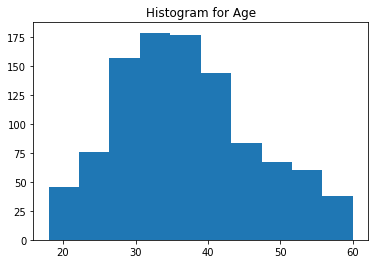

Maximum in range 30 - 35


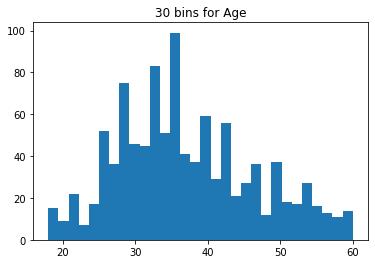

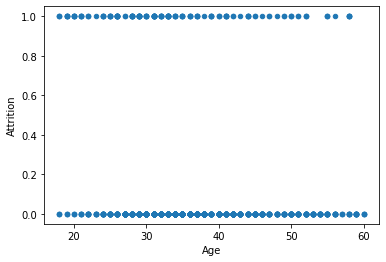

No


In [11]:
# Plot and modify the histogram of Age
plt.hist(df['Age'])
plt.title('Histogram for Age')
plt.show()
print ("Maximum in range 30 - 35")

plt.hist(df['Age'], bins = 30)
plt.title('30 bins for Age')
plt.show()

# Draw a scatter plot between Age and Attrition
df.plot.scatter('Age','Attrition')
plt.show()
print("No")

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

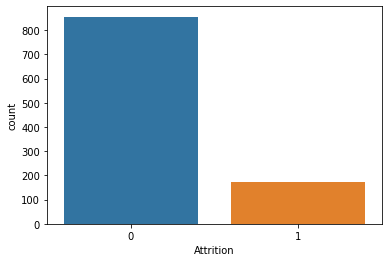

In [12]:
# Get a series of counts of values of Attrition
df['Attrition'].value_counts()

# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
sns.countplot(x="Attrition", data=df)
plt.show()

### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

Travel Rarely has highest number of people



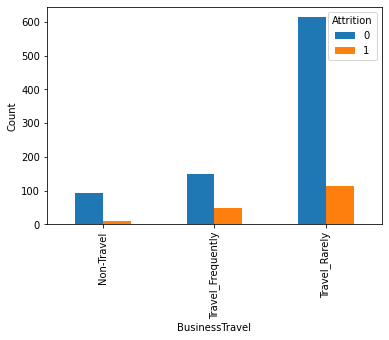

In [13]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 

ct = pd.crosstab(df['BusinessTravel'],df['Attrition'])
ct.plot.bar()
plt.ylabel('Count')

print("Travel Rarely has highest number of people",end = "\n\n")

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

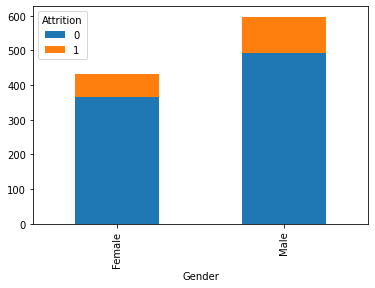

In [14]:
# Draw a stacked bar chart between Attrition and Gender 
ct = pd.crosstab(df['Gender'],df['Attrition'])
ct.plot.bar(stacked = True)
plt.show()

### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

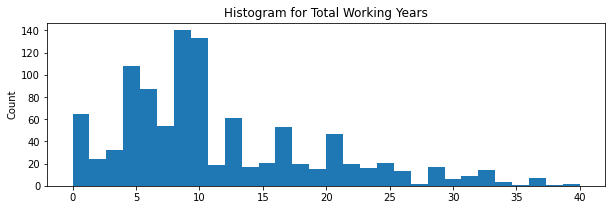

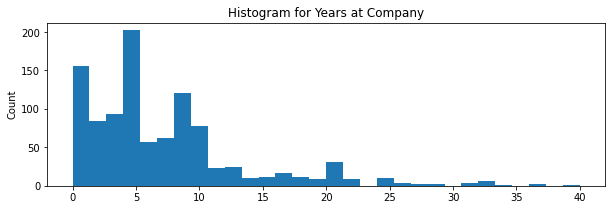

Yes, the value for years at company is skewed


In [15]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.figure(figsize=(10,3))
plt.hist(df['TotalWorkingYears'],bins=30)
plt.ylabel('Count')
plt.title('Histogram for Total Working Years')
plt.show()

# Draw a histogram of YearsAtCompany
plt.figure(figsize=(10,3))
plt.hist(df['YearsAtCompany'],bins=30)
plt.ylabel('Count')
plt.title('Histogram for Years at Company')
plt.show()

print("Yes, the value for years at company is skewed")

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


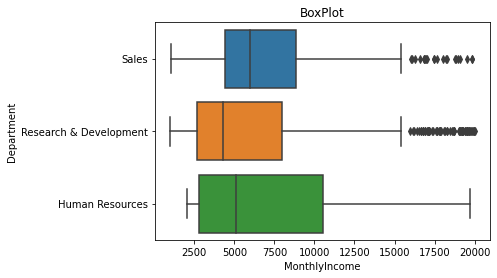


There are outliers in 'Sales' and 'Research&Development'


In [16]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
chart = sns.boxplot('MonthlyIncome','Department',data = df)
plt.title('BoxPlot')
plt.show()

print("\nThere are outliers in 'Sales' and 'Research&Development'")

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

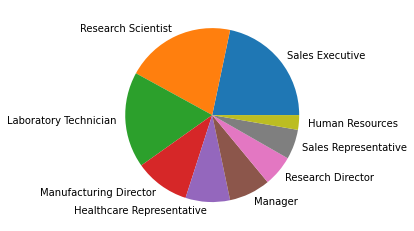

In [17]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
job_counts = df.JobRole.value_counts()
plt.pie(job_counts,labels = job_counts.index.tolist())
plt.show()